In [1]:
from pyspark.sql import SparkSession
from pyspark.sql.types import *
from pyspark.sql import functions as F
from pyspark.sql.types import *
from pyspark.sql.functions import udf, hour, mean, month, year, to_date
from pyspark.sql.window import Window

In [2]:
spark = SparkSession.builder.getOrCreate()

In [3]:
spark.conf.set('spark.sql.repl.eagerEval.enabled', True)

In [4]:
spark

# Schema de données

In [5]:
schema = StructType() \
    .add("STATION", IntegerType(), False) \
    .add("DATE", TimestampType(), False) \
    .add("SOURCE", IntegerType(), True) \
    .add("LATITUDE", FloatType(), True) \
    .add("LONGITUDE", FloatType(), True) \
    .add("ELEVATION", StringType(), True) \
    .add("NAME", StringType(), True) \
    .add("REPORT_TYPE", StringType(), True) \
    .add("CALL_SIGN", StringType(), True) \
    .add("QUALITY_CONTROL", StringType(), True) \
    .add("WND", StringType(), True) \
    .add("CIG", StringType(), True) \
    .add("VIS", StringType(), True) \
    .add("TMP", StringType(), True) \
    .add("DEW", StringType(), True) \
    .add("SLP", StringType(), True) \
    .add("GA1", StringType(), True) \
    .add("GA2", StringType(), True) \
    .add("GA3", StringType(), True) \
    .add("GA4", StringType(), True) \
    .add("GF1", StringType(), True) \
    .add("MA1", StringType(), True) \
    .add("MW1", StringType(), True) \
    .add("MW2", StringType(), True) \
    .add("MW3", StringType(), True) \
    .add("OC1", StringType(), True) \
    .add("REM", StringType(), True) \
    .add("EQD", StringType(), True)

# Chargement des données

In [6]:
# station_2018 = spark.read.load("./data/2018", format="csv", header=True, schema=schema, inferSchema=False)
# station_2018.show()

In [7]:
cols_of_interest = ("STATION","DATE","SOURCE","LATITUDE","LONGITUDE","ELEVATION","NAME","REPORT_TYPE","CALL_SIGN","QUALITY_CONTROL","WND","CIG","VIS","TMP","DEW","SLP")

all_stations = spark.read.load("./data/*", format="csv", header=True, schema=schema, inferSchema=False).select(*cols_of_interest)

In [8]:
all_stations

STATION,DATE,SOURCE,LATITUDE,LONGITUDE,ELEVATION,NAME,REPORT_TYPE,CALL_SIGN,QUALITY_CONTROL,WND,CIG,VIS,TMP,DEW,SLP
826099999,2008-01-01 00:00:00,4,0.0,0.0,0.0,WXPOD8270,FM-15,KFMH,V020,"280,1,N,0062,1","22000,1,9,N","024140,1,N,1","+0020,1","-0040,1","10170,1"
826099999,2008-01-01 00:53:00,4,0.0,0.0,0.0,WXPOD8270,FM-15,KCCR,V020,"100,1,N,0021,1","22000,1,9,N","016093,1,N,1","+9999,9","-0030,1","10231,1"
826099999,2008-01-01 00:53:00,4,0.0,0.0,0.0,WXPOD8270,FM-16,KDAL,V020,"360,1,N,0057,1","22000,1,9,N","016093,1,N,1","+9999,9","+9999,9","99999,9"
826099999,2008-01-01 01:00:00,4,0.0,0.0,0.0,WXPOD8270,FM-15,KFMH,V020,"270,1,N,0046,1","22000,1,9,N","024140,1,N,1","+0010,1","-0040,1","10181,1"
826099999,2008-01-01 01:53:00,4,0.0,0.0,0.0,WXPOD8270,AUTO,KCGI,V020,"300,1,N,0067,1","22000,1,9,N","016093,1,N,1","+0030,1","-0040,1","99999,9"
826099999,2008-01-01 01:53:00,4,0.0,0.0,0.0,WXPOD8270,FM-15,KCCR,V020,"100,1,N,0031,1","22000,1,9,N","016093,1,N,1","+9999,9","-0030,1","10229,1"
826099999,2008-01-01 02:00:00,4,0.0,0.0,0.0,WXPOD8270,FM-15,KFMH,V020,"270,1,N,0051,1","22000,1,9,N","024140,1,N,1","+0010,1","-0040,1","10192,1"
826099999,2008-01-01 02:53:00,4,0.0,0.0,0.0,WXPOD8270,AUTO,KCGI,V020,"280,1,N,0041,1","22000,1,9,N","016093,1,N,1","+0020,1","-0040,1","10190,1"
826099999,2008-01-01 02:53:00,4,0.0,0.0,0.0,WXPOD8270,FM-15,KCCR,V020,"080,1,N,0041,1","22000,1,9,N","016093,1,N,1","+9999,9","-0030,1","10231,1"
826099999,2008-01-01 03:00:00,4,0.0,0.0,0.0,WXPOD8270,SY-MT,KFMH,V020,"300,1,N,0041,1","22000,1,9,N","016000,1,N,1","+0017,1","-0044,1","10203,1"


In [9]:
# Nombre de lignes
all_stations.count()

9573561

## Supprimer les lignes du champ TMP avec des valeurs vides OU des +9999

In [10]:
all_stations = all_stations.na.drop(how="any", subset=["TMP"]).filter(~all_stations.TMP.contains("+9999"))

## Supprimer les lignes du champ ELEVATION avec des valeurs vides OU des +9999

In [11]:
all_stations = all_stations.na.drop(how="any", subset=["ELEVATION"]).filter(~all_stations.ELEVATION.contains("+9999"))

In [12]:
# Nombre de lignes après le drop
all_stations.count()

9320756

In [13]:
# Le schema de données
all_stations.printSchema()

root
 |-- STATION: integer (nullable = true)
 |-- DATE: timestamp (nullable = true)
 |-- SOURCE: integer (nullable = true)
 |-- LATITUDE: float (nullable = true)
 |-- LONGITUDE: float (nullable = true)
 |-- ELEVATION: string (nullable = true)
 |-- NAME: string (nullable = true)
 |-- REPORT_TYPE: string (nullable = true)
 |-- CALL_SIGN: string (nullable = true)
 |-- QUALITY_CONTROL: string (nullable = true)
 |-- WND: string (nullable = true)
 |-- CIG: string (nullable = true)
 |-- VIS: string (nullable = true)
 |-- TMP: string (nullable = true)
 |-- DEW: string (nullable = true)
 |-- SLP: string (nullable = true)



## Split de la colonne température

In [14]:
@udf(returnType=FloatType())
def extract_tmp(tmp_col: str):
    return int(tmp_col.split(',')[0].lstrip('+')) / 10

all_stations = all_stations.withColumn('temperature', extract_tmp(all_stations['TMP']))

In [15]:
all_stations.printSchema()

root
 |-- STATION: integer (nullable = true)
 |-- DATE: timestamp (nullable = true)
 |-- SOURCE: integer (nullable = true)
 |-- LATITUDE: float (nullable = true)
 |-- LONGITUDE: float (nullable = true)
 |-- ELEVATION: string (nullable = true)
 |-- NAME: string (nullable = true)
 |-- REPORT_TYPE: string (nullable = true)
 |-- CALL_SIGN: string (nullable = true)
 |-- QUALITY_CONTROL: string (nullable = true)
 |-- WND: string (nullable = true)
 |-- CIG: string (nullable = true)
 |-- VIS: string (nullable = true)
 |-- TMP: string (nullable = true)
 |-- DEW: string (nullable = true)
 |-- SLP: string (nullable = true)
 |-- temperature: float (nullable = true)



## Création du champ season

In [16]:
@udf(returnType=StringType())
def create_season(month: int):
    if month in [7, 8, 9]:
        season = 'Summer'
    elif month in [10, 11, 12]:
        season = 'Autumn'
    elif month in [1, 2, 3]:
        season = 'Winter'
    else:
        season = 'Spring'
    return season

all_stations = all_stations.withColumn('season', create_season(month("DATE")))

In [17]:
all_stations.printSchema()

root
 |-- STATION: integer (nullable = true)
 |-- DATE: timestamp (nullable = true)
 |-- SOURCE: integer (nullable = true)
 |-- LATITUDE: float (nullable = true)
 |-- LONGITUDE: float (nullable = true)
 |-- ELEVATION: string (nullable = true)
 |-- NAME: string (nullable = true)
 |-- REPORT_TYPE: string (nullable = true)
 |-- CALL_SIGN: string (nullable = true)
 |-- QUALITY_CONTROL: string (nullable = true)
 |-- WND: string (nullable = true)
 |-- CIG: string (nullable = true)
 |-- VIS: string (nullable = true)
 |-- TMP: string (nullable = true)
 |-- DEW: string (nullable = true)
 |-- SLP: string (nullable = true)
 |-- temperature: float (nullable = true)
 |-- season: string (nullable = true)



## Moyenne des températures par année/mois/journée/saison

In [18]:
# Par année
mean_tmp_by_year = all_stations.groupBy([year("DATE").alias("year")]).agg(mean("temperature").alias("mean_tmp"))
mean_tmp_by_year = mean_tmp_by_year.sort("year")
mean_tmp_by_year

year,mean_tmp
2000,6.676732570305787
2002,4.976165004614428
2004,5.128241445325596
2006,4.283613263977693
2008,3.636111808362767
2010,2.102685854412489
2012,2.2853650198653495
2014,2.513692370458653
2016,2.5297198968771135
2018,1.9917920677494778


In [19]:
# Par mois
mean_tmp_by_month = all_stations.groupBy([year("DATE").alias("year"), month("DATE").alias("month")]).agg(mean("temperature").alias("mean_tmp"))
mean_tmp_by_month = mean_tmp_by_month.sort("year", "month")
mean_tmp_by_month

year,month,mean_tmp
2000,1,0.3137670401007231
2000,2,0.3859627695553859
2000,3,1.628639935549314
2000,4,4.485998215931641
2000,5,9.459909050709852
2000,6,11.571748782505892
2000,7,13.819235464133062
2000,8,13.5500085989656
2000,9,10.827875838113352
2000,10,8.54312500879361


In [20]:
# Par jour
mean_tmp_by_day = all_stations.groupBy(to_date("DATE").cast("date").alias("date")).agg(mean("temperature").alias("mean_tmp"))
mean_tmp_by_day = mean_tmp_by_day.sort("date")
mean_tmp_by_day

date,mean_tmp
2000-01-01,-0.6716621865461644
2000-01-02,1.6958582251284855
2000-01-03,1.8629008217073704
2000-01-04,1.4960574121728842
2000-01-05,1.0262799981549382
2000-01-06,2.5688683107311343
2000-01-07,3.9012439623558075
2000-01-08,3.827774293345468
2000-01-09,2.2706869881289906
2000-01-10,1.9399587871411201


In [21]:
# Par saison
mean_tmp_by_season = all_stations.groupBy([year("DATE").alias("year"), "season"]).agg(mean("temperature").alias("mean_tmp"))
mean_tmp_by_season = mean_tmp_by_season.sort("year", "season")
mean_tmp_by_season

year,season,mean_tmp
2000,Autumn,4.7103472514813
2000,Spring,8.532272508882167
2000,Summer,12.736410181261036
2000,Winter,0.7836069559721641
2002,Autumn,-2.249063715898641
2002,Spring,9.642368533128352
2002,Summer,14.435654191012262
2002,Winter,-2.158495249674572
2004,Autumn,1.6460110800745236
2004,Spring,8.232080454303253


In [22]:
# Avec SQL
# all_stations.createOrReplaceTempView("stations_view")
# spark.sql('''SELECT STATION, year(DATE), month(DATE), month, AVG(temperature)
# FROM stations_view
# GROUP BY year(DATE), month(DATE)''').show()

## Min/Max des températures par année/mois/journée/saison

In [23]:
# Par année
min_max_tmp_by_year = all_stations.groupBy([year("DATE").alias("year")]).agg(F.min("temperature").alias("min_tmp"), F.max("temperature").alias("max_tmp"))
min_max_tmp_by_year = min_max_tmp_by_year.sort("year")
min_max_tmp_by_year

year,min_tmp,max_tmp
2000,-36.4,39.0
2002,-42.0,54.0
2004,-48.5,31.2
2006,-41.3,41.0
2008,-75.0,35.0
2010,-42.0,36.0
2012,-39.4,42.0
2014,-41.7,37.4
2016,-42.4,38.0
2018,-37.8,33.0


In [24]:
# Par mois
min_max_tmp_by_month = all_stations.groupBy([year("DATE").alias("year"), month("DATE").alias("month")]).agg(F.min("temperature").alias("min_tmp"), F.max("temperature").alias("max_tmp"))
min_max_tmp_by_month = min_max_tmp_by_month.sort("year", "month")
min_max_tmp_by_month

year,month,min_tmp,max_tmp
2000,1,-36.4,28.0
2000,2,-31.6,21.0
2000,3,-33.2,30.0
2000,4,-27.6,28.1
2000,5,-13.5,34.2
2000,6,-30.0,32.0
2000,7,-1.6,31.0
2000,8,-2.6,39.0
2000,9,-6.0,30.0
2000,10,-19.7,21.6


In [25]:
# Par jour
min_max_tmp_by_day = all_stations.groupBy(to_date("DATE").cast("date").alias("date")).agg(F.min("temperature").alias("min_tmp"), F.max("temperature").alias("max_tmp"))
min_max_tmp_by_day = min_max_tmp_by_day.sort("date")
min_max_tmp_by_day

date,min_tmp,max_tmp
2000-01-01,-24.1,10.3
2000-01-02,-19.1,11.6
2000-01-03,-21.0,11.9
2000-01-04,-14.7,9.2
2000-01-05,-25.5,11.5
2000-01-06,-25.0,11.7
2000-01-07,-17.0,12.0
2000-01-08,-5.6,10.0
2000-01-09,-11.0,8.4
2000-01-10,-17.1,18.0


In [26]:
# Par saison
min_max_tmp_by_season = all_stations.groupBy([year("DATE").alias("year"), "season"]).agg(F.min("temperature").alias("min_tmp"), F.max("temperature").alias("max_tmp"))
min_max_tmp_by_season = min_max_tmp_by_season.sort("year", "season")
min_max_tmp_by_season

year,season,min_tmp,max_tmp
2000,Autumn,-35.9,21.6
2000,Spring,-30.0,34.2
2000,Summer,-6.0,39.0
2000,Winter,-36.4,30.0
2002,Autumn,-40.2,26.9
2002,Spring,-26.5,40.0
2002,Summer,-10.0,35.5
2002,Winter,-42.0,54.0
2004,Autumn,-34.3,26.5
2004,Spring,-24.3,27.0


## Moyenne des Températures et des Elevations (niveau de la mer) par année

In [27]:
mean_tmp_elevation_by_year = all_stations.groupBy([year("DATE").alias("year"), "STATION"]).agg(mean("temperature").alias("mean_tmp"), mean("ELEVATION").alias("mean_elevation"))
mean_tmp_elevation_by_year = mean_tmp_elevation_by_year.sort("year")
mean_tmp_elevation_by_year.count()

1056

In [28]:
df_pandas = mean_tmp_elevation_by_year.toPandas()

In [29]:
df_pandas.head()

,year,STATION,mean_tmp,mean_elevation
0,2000,2.036100e+09,-0.641496,468.0
1,2000,1.476100e+09,4.700000,5.0
2,2000,1.062100e+09,-3.052862,10.0
3,2000,1.446100e+09,3.702682,714.0
4,2000,1.103100e+09,-3.337736,47.0


In [30]:
import seaborn as sns
%matplotlib inline

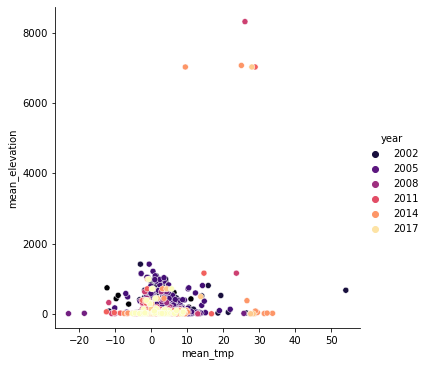

In [31]:
g = sns.relplot(x="mean_tmp", y="mean_elevation", hue="year", data=df_pandas, palette ='magma')
